170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


C:\Users\OJAS VIJAY AMBEKAR\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 59ms/step - accuracy: 0.2968 - loss: 1.8684 - val_accuracy: 0.4979 - val_loss: 1.3945
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.5148 - loss: 1.3401 - val_accuracy: 0.5925 - val_loss: 1.1367
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.5738 - loss: 1.1966 - val_accuracy: 0.6347 - val_loss: 1.0351
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.6200 - loss: 1.0785 - val_accuracy: 0.6577 - val_loss: 0.9735
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.6401 - loss: 1.0124 - val_accuracy: 0.6662 - val_loss: 0.9399
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.6587 - loss: 0.9646 - val_accuracy: 0.6814 - val_loss: 0.9059
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.6811 - loss: 0.9141 - val_accuracy: 0.6986 - val_loss: 0.8655
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.6903 - loss: 0.8766 - 

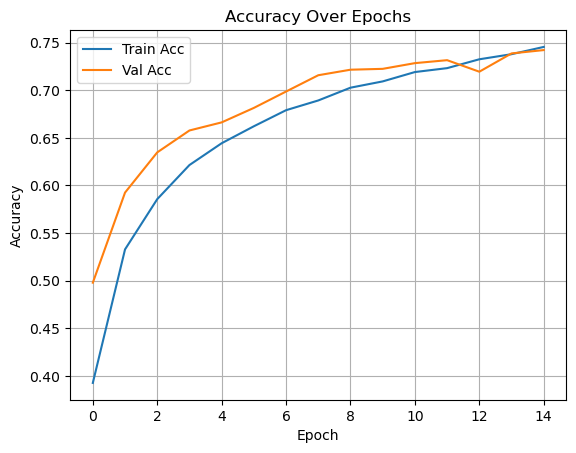

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)

# Hyperparameters
LEARNING_RATE = 0.001
DROPOUT_RATE = 0.5
EPOCHS = 15
BATCH_SIZE = 64
OPTIMIZER = Adam(learning_rate=LEARNING_RATE)

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dropout(DROPOUT_RATE),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=OPTIMIZER,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()
